In [1]:
from datasets import load_dataset
import pandas as pd
import matplotlib.pyplot as plt

#load data
dataSet = load_dataset('lukebarousse/data_jobs')
df = dataSet['train'].to_pandas()


#clean data
df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])

c:\Users\Booheymen\AppData\Local\Programs\Python\Python312\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


## Pivot Table Parameters:
values='salary_year_avg': Specifies the column whose values you want to aggregate, which is salary_year_avg in this case.

aggfunc='median': Defines the aggregation function to apply to the values. Here, the median is used.

index='job_country': Sets the job_country column as the index for the rows.

columns='job_title_short': Sets the job_title_short column as the columns for the pivot table

In [4]:
df.pivot_table(values='salary_year_avg',aggfunc='median',index='job_country',columns='job_title_short')

job_title_short,Business Analyst,Cloud Engineer,Data Analyst,Data Engineer,Data Scientist,Machine Learning Engineer,Senior Data Analyst,Senior Data Engineer,Senior Data Scientist,Software Engineer
job_country,,,,,,,,,,
Albania,NaN,NaN,49950.00,NaN,69981.25,NaN,NaN,NaN,157500.0,NaN
Algeria,NaN,NaN,44100.00,45000.0,NaN,NaN,NaN,NaN,NaN,NaN
Argentina,71100.0,197500.0,92771.75,96773.0,71000.00,101029.0,NaN,147500.0,NaN,174500.0
Armenia,NaN,NaN,100500.00,48750.0,NaN,87021.0,NaN,NaN,NaN,NaN
Australia,70000.0,110000.0,109500.00,106712.5,139216.00,101029.0,50640.0,147500.0,157500.0,118350.0
...,...,...,...,...,...,...,...,...,...,...
Uruguay,NaN,NaN,100500.00,NaN,NaN,50000.0,NaN,NaN,57500.0,NaN
Uzbekistan,NaN,NaN,NaN,NaN,30750.00,NaN,NaN,NaN,NaN,NaN
Vietnam,79200.0,NaN,75550.00,96773.0,70000.00,57600.0,105837.5,147500.0,79200.0,53600.0


## Bar Chart


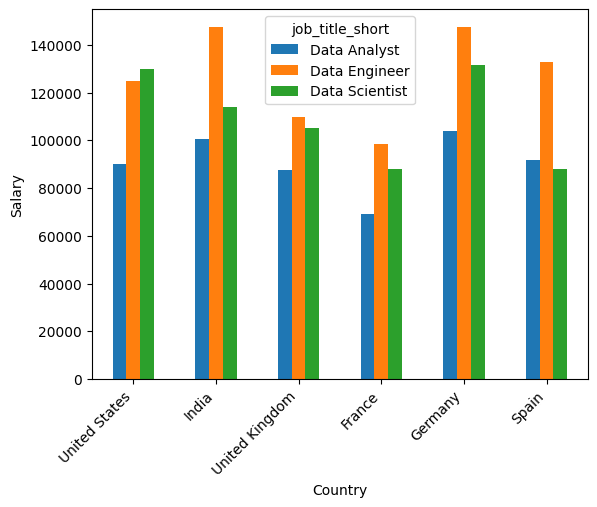

In [17]:
# Get the top 6 countries with the highest job counts
top_countries = df['job_country'].value_counts().head(6).index

# List of specific job titles to be included in the analysis
job_titles = ['Data Analyst', 'Data Engineer', 'Data Scientist']

# Create a pivot table with median salary values, indexed by job country and job title
df_job_country_salary = df.pivot_table(
    values='salary_year_avg',
    aggfunc='median',
    index='job_country',
    columns='job_title_short'
)

# Filter the pivot table to only include the top countries
df_job_country_salary = df_job_country_salary.loc[top_countries]

# Further filter the pivot table to only include the specified job titles
df_job_country_salary = df_job_country_salary[job_titles]

# Plot the data as a bar chart
df_job_country_salary.plot(kind='bar')

# Set the label for the y-axis
plt.ylabel('Salary')

# Set the label for the x-axis
plt.xlabel('Country')

# Rotate the x-axis labels for better readability
plt.xticks(rotation=45, ha='right')

# Display the plot
plt.show()
